In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
from sklearn.preprocessing import OneHotEncoder,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')

## Problem Statement

The goal of this project is to analyze global population trends using historical data and
 predict future population growth. This involves using machine learning techniques to
explore demographic data, identify key factors influencing population changes, and build
 predictive models.

## loading dataset

In [2]:
data = pd.read_csv(r"D:\unified mentor internship\world_population.csv")

In [3]:
data.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


## Dataset Glossary (Column-Wise)

 ● Rank:RankbyPopulation.
 
 ● CCA3:3Digit Country/Territories Code.
 
 ● Country/Territories: Name of the Country/Territories.
 
 ● Capital: Name of the Capital.
 
 ● Continent: Name of the Continent.
 
 ● 2022Population: Population of the Country/Territories in the year 2022.
 
 ● 2020Population: Population of the Country/Territories in the year 2020.
 
 ● 2015Population: Population of the Country/Territories in the year 2015.
 
 ● 2010Population: Population of the Country/Territories in the year 2010.
 
 ● 2000Population: Population of the Country/Territories in the year 2000.
 
 ● 1990Population: Population of the Country/Territories in the year 1990.
 
 ● 1980Population: Population of the Country/Territories in the year 1980.
 
 ● 1970Population: Population of the Country/Territories in the year 1970.
 
 ● Area(km²): Area size of the Country/Territories in square kilometer.

 ● Density (per km²): Population Density per square kilometer.

 ● GrowthRate: Population Growth Rate by Country/Territories.
 
 ● WorldPopulation Percentage: The population percentage by each Country/Territories

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

## Simple EDA

In [5]:
data.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

There is no missing values in the dataset.

In [6]:
data.duplicated().sum()

0

There is no duplicates.

In [7]:
data.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

All datatypes are perfectly suitable.

In [8]:
data.describe().T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
Rank,234.00,117.50,67.69,1.00,59.25,117.50,175.75,234.00
2022 Population,234.00,34074414.71,136766424.80,510.00,419738.50,5559944.50,22476504.75,1425887337.00
2020 Population,234.00,33501070.95,135589876.92,520.00,415284.50,5493074.50,21447979.50,1424929781.00
2015 Population,234.00,31729956.24,130404992.75,564.00,404676.00,5307400.00,19730853.75,1393715448.00
2010 Population,234.00,29845235.03,124218487.63,596.00,393149.00,4942770.50,19159567.50,1348191368.00
2000 Population,234.00,26269468.82,111698206.72,651.00,327242.00,4292907.00,15762301.00,1264099069.00
1990 Population,234.00,22710220.79,97832173.35,700.00,264115.75,3825409.50,11869231.00,1153704252.00
1980 Population,234.00,18984616.97,81785186.08,733.00,229614.25,3141145.50,9826053.75,982372466.00
1970 Population,234.00,15786908.81,67795091.64,752.00,155997.00,2604830.00,8817329.00,822534450.00
Area (km²),234.00,581449.38,1761840.86,1.00,2650.00,81199.50,430425.75,17098242.00


We can see from this matrix,year by year the population is increasing 

## Removing unnecessary columns

In [9]:
data.drop(columns=['Rank','CCA3','Capital'],inplace=True)

In [10]:
data.columns

Index(['Country/Territory', 'Continent', '2022 Population', '2020 Population',
       '2015 Population', '2010 Population', '2000 Population',
       '1990 Population', '1980 Population', '1970 Population', 'Area (km²)',
       'Density (per km²)', 'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [11]:
data.rename(columns = {'Country/Territory':'Country'},inplace=True)

In [12]:
data.columns

Index(['Country', 'Continent', '2022 Population', '2020 Population',
       '2015 Population', '2010 Population', '2000 Population',
       '1990 Population', '1980 Population', '1970 Population', 'Area (km²)',
       'Density (per km²)', 'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [13]:
new_data = data.melt(
    id_vars = ['Country','Continent','Area (km²)','Density (per km²)','Growth Rate','World Population Percentage'],
    value_vars = [col for col in data.columns if 'Population' in col and col != 'World Population Percentage'],
    var_name = 'Year',
    value_name = 'Population'
)

In [14]:
new_data.head()

,Country,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Population
0,Afghanistan,Asia,652230,63.0587,1.0257,0.52,2022 Population,41128771
1,Albania,Europe,28748,98.8702,0.9957,0.04,2022 Population,2842321
2,Algeria,Africa,2381741,18.8531,1.0164,0.56,2022 Population,44903225
3,American Samoa,Oceania,199,222.4774,0.9831,0.00,2022 Population,44273
4,Andorra,Europe,468,170.5641,1.0100,0.00,2022 Population,79824


In [15]:
new_data['Year'] = new_data['Year'].str.split().str[0]

In [16]:
new_data.head()

,Country,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Population
0,Afghanistan,Asia,652230,63.0587,1.0257,0.52,2022,41128771
1,Albania,Europe,28748,98.8702,0.9957,0.04,2022,2842321
2,Algeria,Africa,2381741,18.8531,1.0164,0.56,2022,44903225
3,American Samoa,Oceania,199,222.4774,0.9831,0.00,2022,44273
4,Andorra,Europe,468,170.5641,1.0100,0.00,2022,79824


In [17]:
new_data.dtypes

Country                         object
Continent                       object
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
Year                            object
Population                       int64
dtype: object

In [18]:
new_data['Year'] = new_data['Year'].astype('int')

In [19]:
new_data.dtypes

Country                         object
Continent                       object
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
Year                             int32
Population                       int64
dtype: object

## Univariate Analysis

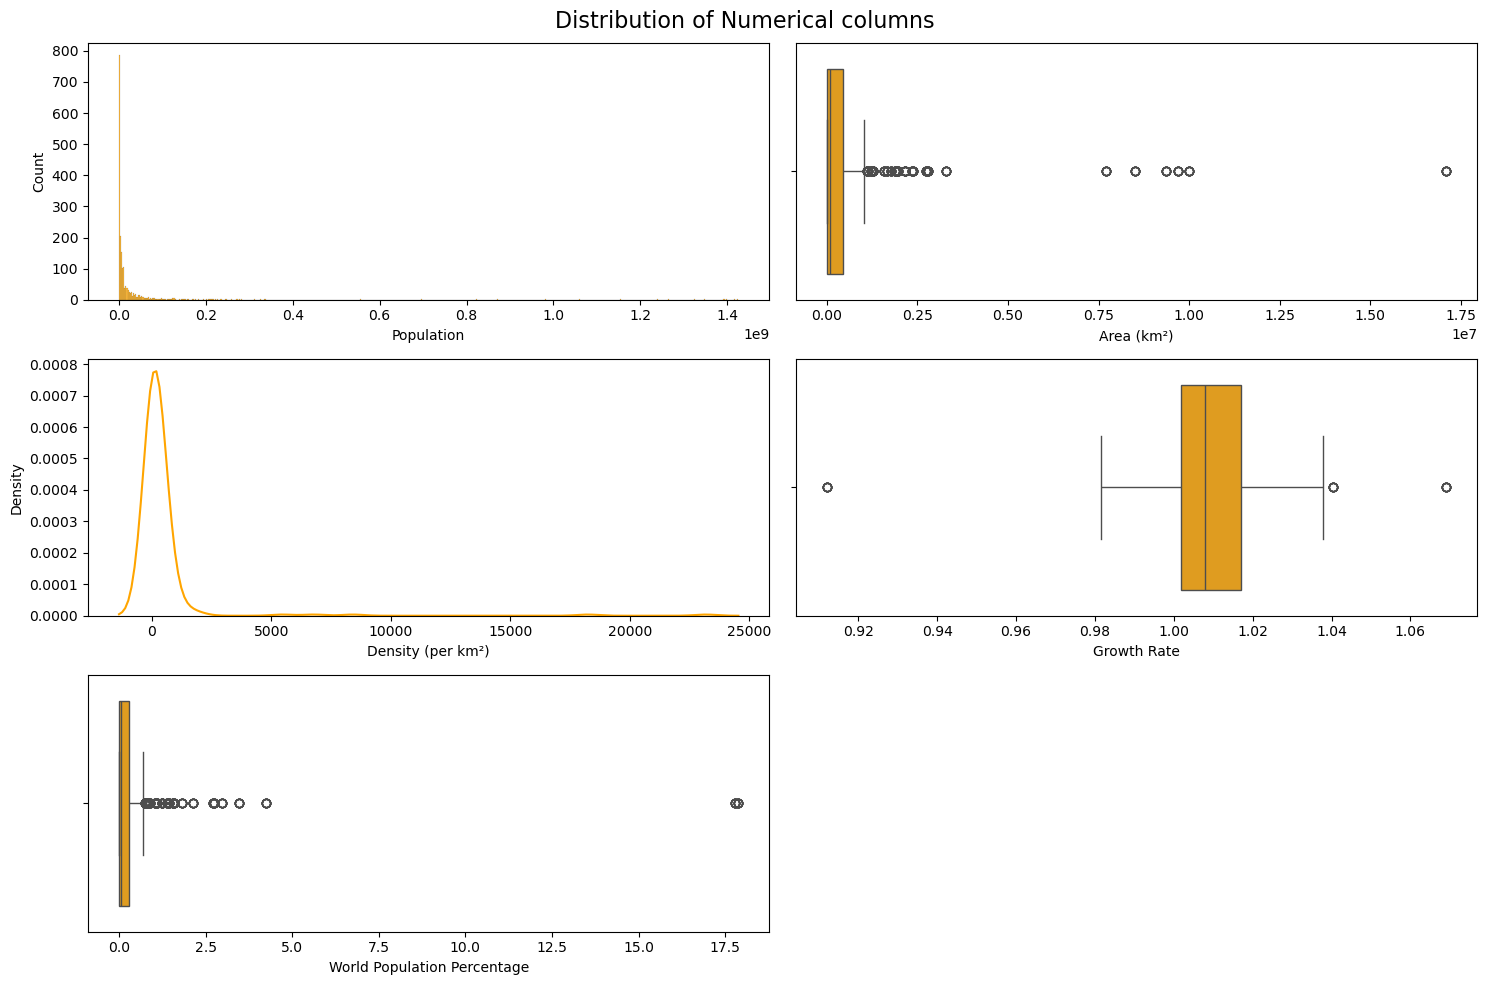

In [20]:
plt.figure(figsize=(15,10))
plt.suptitle('Distribution of Numerical columns',fontsize=16)
plt.subplot(321)
sns.histplot(x=new_data['Population'],color='orange')
plt.subplot(322)
sns.boxplot(x=new_data['Area (km²)'],color='orange')
plt.subplot(323)
sns.kdeplot(x=new_data['Density (per km²)'],color='orange')
plt.subplot(324)
sns.boxplot(x=new_data['Growth Rate'],color='orange')
plt.subplot(325)
sns.boxplot(x=new_data['World Population Percentage'],color='orange')

plt.tight_layout()
plt.show();

The Data is looking right skewed except growth rate coloumn.

In [21]:
new_data.select_dtypes(exclude='object').skew()

Area (km²)                     6.047809
Density (per km²)              8.898606
Growth Rate                   -1.095473
World Population Percentage    9.099631
Year                          -0.422382
Population                     9.824845
dtype: float64

The most of the columns have high positive skewness.so we perform log transformation for handling outliers.

In [22]:
new_data.head()

,Country,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Population
0,Afghanistan,Asia,652230,63.0587,1.0257,0.52,2022,41128771
1,Albania,Europe,28748,98.8702,0.9957,0.04,2022,2842321
2,Algeria,Africa,2381741,18.8531,1.0164,0.56,2022,44903225
3,American Samoa,Oceania,199,222.4774,0.9831,0.00,2022,44273
4,Andorra,Europe,468,170.5641,1.0100,0.00,2022,79824


In [23]:
new_data.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

There are 6 continents in the dataset.

## Bivariate Analysis

In [24]:
new_data.head()

,Country,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Population
0,Afghanistan,Asia,652230,63.0587,1.0257,0.52,2022,41128771
1,Albania,Europe,28748,98.8702,0.9957,0.04,2022,2842321
2,Algeria,Africa,2381741,18.8531,1.0164,0.56,2022,44903225
3,American Samoa,Oceania,199,222.4774,0.9831,0.00,2022,44273
4,Andorra,Europe,468,170.5641,1.0100,0.00,2022,79824


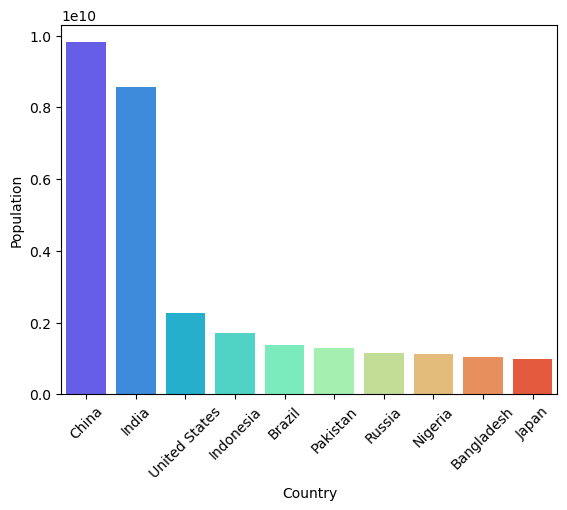

In [25]:
top_countries = new_data.groupby(['Country'])['Population'].sum().nlargest(10)
sns.barplot(x=top_countries.index,y=top_countries.values,palette='rainbow')
plt.xticks(rotation=45)
plt.ylabel('Population')
plt.show();

China is the country with the Most Population,And Nearby to china,india is there.

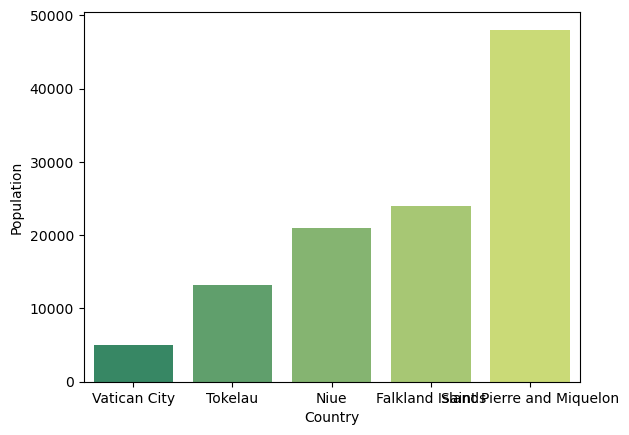

In [26]:
bottom_countries = new_data.groupby(['Country'])['Population'].sum().nsmallest(5)
sns.barplot(x=bottom_countries.index,y=bottom_countries.values,palette='summer')
plt.ylabel('Population')
plt.show();

Vatican is the most lowest population country.

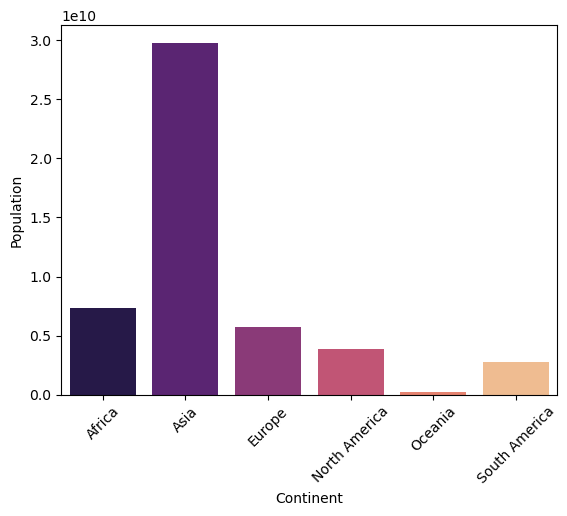

In [27]:
continents_data = new_data.groupby(['Continent'])['Population'].sum()
sns.barplot(x=continents_data.index,y=continents_data.values,palette='magma')
plt.xticks(rotation=45)
plt.ylabel('Population')
plt.show();

Asia is the highest population continent.

oceania is the lowest population continent.

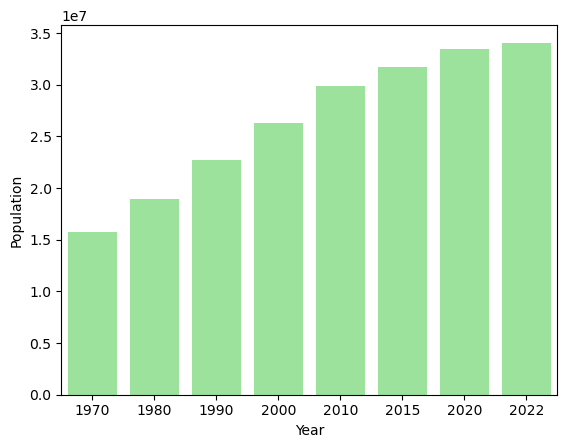

In [28]:
sns.barplot(x=new_data['Year'],y=new_data['Population'],color='lightgreen',ci=False)
plt.show();

The population is incresing year by year.

## Multivariate Analysis

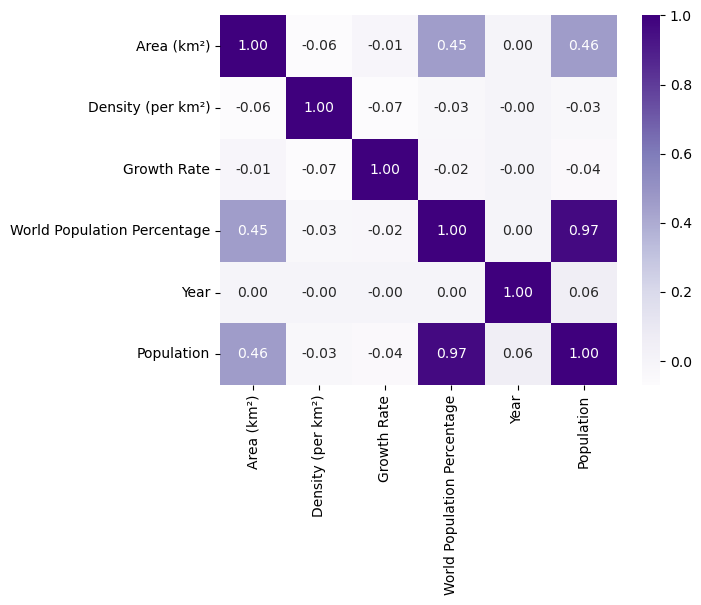

In [29]:
sns.heatmap(new_data.corr(numeric_only=True),annot=True,fmt='.2f',cmap='Purples')
plt.show();

-- Here Area,world population percentage,population are positively correlated.

### Applying transformations for handling outliers.

#### Positive skewness transformation using log

In [30]:
new_data['Area (km²)'] = np.log1p(new_data['Area (km²)'])
new_data['Density (per km²)'] = np.log1p(new_data['Density (per km²)'])
new_data['World Population Percentage'] = np.log1p(new_data['World Population Percentage'])
new_data['Population'] = np.log1p(new_data['Population'])


#### Negative skewness transformation using square

In [31]:
new_data['Growth Rate'] = new_data['Growth Rate']**2

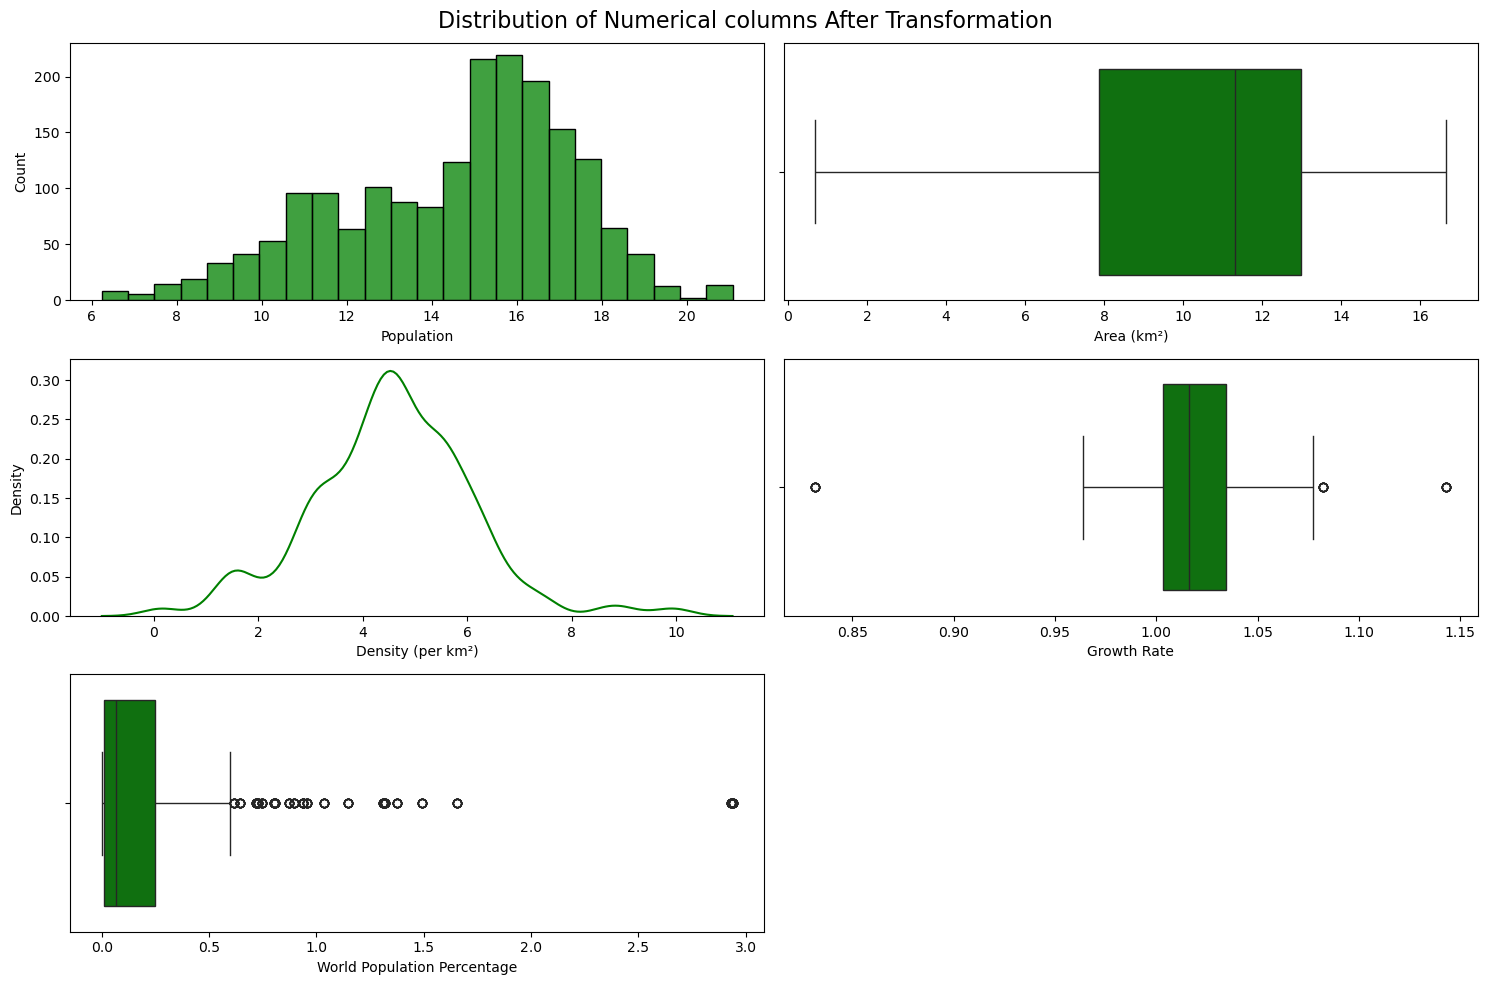

In [32]:
plt.figure(figsize=(15,10))
plt.suptitle('Distribution of Numerical columns After Transformation',fontsize=16)
plt.subplot(321)
sns.histplot(x=new_data['Population'],color='green')
plt.subplot(322)
sns.boxplot(x=new_data['Area (km²)'],color='green')
plt.subplot(323)
sns.kdeplot(x=new_data['Density (per km²)'],color='green')
plt.subplot(324)
sns.boxplot(x=new_data['Growth Rate'],color='green')
plt.subplot(325)
sns.boxplot(x=new_data['World Population Percentage'],color='green')

plt.tight_layout()
plt.show();

In [33]:
new_data.select_dtypes(exclude='object').skew()

Area (km²)                    -0.674326
Density (per km²)              0.171402
Growth Rate                   -0.840926
World Population Percentage    3.950158
Year                          -0.422382
Population                    -0.536152
dtype: float64

Still world population percentage have high skewness. we can do some boxcox transformations after splitting the data into train and test.Now we can move like this only.

In [34]:
new_data.head()

,Country,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year,Population
0,Afghanistan,Asia,13.388154,4.159800,1.052060,0.418710,2022,17.532218
1,Albania,Europe,10.266358,4.603871,0.991418,0.039221,2022,14.860132
2,Algeria,Africa,14.683343,2.988360,1.033069,0.444686,2022,17.620020
3,American Samoa,Oceania,5.298317,5.409310,0.966486,0.000000,2022,10.698153
4,Andorra,Europe,6.150603,5.144957,1.020100,0.000000,2022,11.287592


## Preprocessing

In [35]:
features = new_data.iloc[:,:-1]
target = new_data.iloc[:,-1]

In [36]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=12)

In [37]:
x_train.head()

,Country,Continent,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Year
39,Chad,Africa,14.065492,2.694843,1.064199,0.198851,2022
896,South Korea,Asia,11.515033,6.250115,0.999400,0.500775,2010
291,Egypt,Africa,13.817959,4.715985,1.031850,0.871293,2020
24,Bolivia,South America,13.909531,2.495451,1.024144,0.139762,2022
1605,Switzerland,Europe,10.628255,5.359957,1.011231,0.104360,1980


In [38]:
cat_col = ['Country','Continent']
less_skewcol = ['Area (km²)','Density (per km²)','Growth Rate','Year']
robust_scali = ['World Population Percentage']

In [39]:
step1 = ColumnTransformer(transformers = [
    ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False),cat_col),
    ('rs',RobustScaler(),robust_scali),
    ('ss',StandardScaler(),less_skewcol)
],remainder='passthrough')
step2 = LinearRegression()

pipe = Pipeline([('preprocessing',step1),
                ('model',step2)])

pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Continent']),
                                                 ('rs', RobustScaler(),
                                                  ['World Population '
                                                   'Percentage']),
                                                 ('ss', StandardScaler(),
                                                  ['Area (km²)',
                                                   'Density (per km²)',
                                                   'Growth Rate', 'Year'])])),
                ('model', LinearRegression())])

In [40]:
y_pred = pipe.predict(x_test)

In [41]:
r2_score(y_test,y_pred)

0.9897626512512223

In [42]:
mean_squared_error(y_test,y_pred)

0.07651040341660326

In [48]:
original = np.expm1(y_pred)